# Homework 1 - data validation & cleaning (deadline 30. 10. 2022, 23:59)

In short, the main task is to clean The Metropolitan Museum of Art Open Access dataset.
  
> The instructions are not given in details: It is up to you to come up with ideas on how to fulfill the particular tasks as best as you can!

However, we **strongly recommend and require** the following:
* Follow the assignment step by step. Number each step.
* Most steps contain the number of features that should be treated. You can preprocess more features, however, it does not mean that the teacher will give you more points. Focus on quality, not quantity.
* Properly comment all your steps. Comments are evaluated for 2 points of the total together with the final presentation of the solution. However, it is not desirable to write novels! 
* This task is the most challenging of the three, both timewise and computationally. Do not leave it to the last minute.
* Hand in a notebook that has already been run (i.e. do not delete outputs before handing in).

## What are you supposed to do:

  1. Download the dataset MetObjects.csv from the repository https://github.com/metmuseum/openaccess/.
  2. Check consistency (i.e. that same things are represented in the same way) of at least **three features** where you expect problems (include "Object Name" feature). You can propose how to clean the selected features, however do not apply cleaning (in your interest) 🙂 _(1.5 points)_
  3. Select at least **two features** where you expect integrity problems (describe your choice) and check integrity of those features. By integrity we mean correct logical relations between features (e.g. female names for females only). _(2 points)_
  4. Convert at least **five features** to a proper data type. Choose at least one numeric, one categorical and one datetime. _(1.5 points)_
  5. Find some outliers and describe your method. _(3 points, depends on creativity)_
  6. Detect missing data in at least **three features**, convert them to a proper representation (if they are already not), and impute missing values in at least **one feature**. _(1 + 3 points, depends on creativity)_
  7. Focus more precisely on the cleaning of the "Medium" feature. As if you were to use it in KNN algorithm later. _(2 points)_
  8. Focus on the extraction of physical dimensions of each item (width, depth and height in centimeters) from the "Dimensions" feature. _(2 points)_
  
All your steps and following code **have to be commented!** Comments are evaluated for 2 points together with the final presentation of the solution.

**If you do all this properly, you will obtain 18 points.**

## Comments

  * Please follow the technical instructions from https://courses.fit.cvut.cz/NI-PDD/homeworks/index.html.
  * If the reviewing teacher is not satisfied, she can (!) give you another chance to rework your homework and to obtain more points. However, this is not a given, so do your best! :)

## 1. Download dataset

In [1]:
import re
import nltk

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from collections import OrderedDict
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#nltk.download('punkt')
#nltk.download('stopwords')

In [3]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None)

In [4]:
df = pd.read_csv('MetObjects.csv', low_memory=False)

### Info o datasetu

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477804 entries, 0 to 477803
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Object Number            477804 non-null  object 
 1   Is Highlight             477804 non-null  bool   
 2   Is Timeline Work         477804 non-null  bool   
 3   Is Public Domain         477804 non-null  bool   
 4   Object ID                477804 non-null  int64  
 5   Gallery Number           51776 non-null   object 
 6   Department               477804 non-null  object 
 7   AccessionYear            474248 non-null  object 
 8   Object Name              476113 non-null  object 
 9   Title                    448619 non-null  object 
 10  Culture                  207379 non-null  object 
 11  Period                   90956 non-null   object 
 12  Dynasty                  23233 non-null   object 
 13  Reign                    11226 non-null   object 
 14  Port

In [6]:
df.head()

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,Reign,Portfolio,Constituent ID,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Artist Gender,Artist ULAN URL,Artist Wikidata URL,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,1979.486.1,False,False,False,1,NaN,The American Wing,1979,Coin,One-dollar Liberty Head Coin,NaN,NaN,NaN,NaN,NaN,16429,Maker,,James Barton Longacre,"American, Delaware County, Pennsylvania 1794–1869 Philadelphia, Pennsylvania",,"Longacre, James Barton",American,1794,1869,NaN,http://vocab.getty.edu/page/ulan/500011409,https://www.wikidata.org/wiki/Q3806459,1853,1853,1853,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
1,1980.264.5,False,False,False,2,NaN,The American Wing,1980,Coin,Ten-dollar Liberty Head Coin,NaN,NaN,NaN,NaN,NaN,107,Maker,,Christian Gobrecht,1785–1844,,"Gobrecht, Christian",,1785,1844,NaN,http://vocab.getty.edu/page/ulan/500077295,https://www.wikidata.org/wiki/Q5109648,1901,1901,1901,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
2,67.265.9,False,False,False,3,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
3,67.265.10,False,False,False,4,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
4,67.265.11,False,False,False,5,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN


## 2. Check consistency
Check consistency (i.e. that same things are represented in the same way) of at least **three features** where you expect problems (include "Object Name" feature). You can propose how to clean the selected features, however do not apply cleaning

### Object name
Obsahuje popis fyzické podoby daného objektu. 

Datový typ je string (Dtype -- Object).

Příznak Object name obsahuje poměrně velké množství unikátních záznamů -- 28 450, jak je vidět z výsledků buněk níže. Při bližším průzkumu si můžeme povšimnout, že 18 669 z možných hodnot je v rámci celého datasetu zastoupeno pouze jednou. Dále pak můžeme evidovat velké skoky v zastoupení nejčastějších hodnot. Nejčastěji je zastoupeno: Print (99 439 záznamů), druhé v pořadí Photograph obsahuje 28 458 záznamů. 

In [7]:
df['Object Name'].describe()

count     476113
unique     28449
top        Print
freq       99439
Name: Object Name, dtype: object

In [8]:
# pocet unikatnich zaznamu
print(len(df['Object Name'].unique()))
print(len(df['Object Name'].value_counts().loc[lambda x: x==1]))

28450
18669


Nekonzistence panuje také v podrobnosti pojmenování dané položky. Jsou zde zastoupeny vágní názvy jako: 
* Piece, 
* Dish,
* Jar. 

Stejně tak se zde vyskytují také poměrně již podrobné podrobné popisy:  
- Sword-hilt collar and pommel (Fuchigashira),
- Folding fan mounted as an album leaf,
- Akhenaten or Nefertiti big toe of prostrate foot (?).

Ty jsou často doplněny ještě původním názvem objektu, místem nalezení apod. Vyskytuje se zde často zápis: (?).
S tím také souvisí nekonzistence v podobě délky pojmenování jednotlivých záznamů.

Problematické je taktéž pojmenovávání stejných názvů různými opisy. Ku příkladu: 
- Album  ; Drawing ; Ornament and Architecture 
- Album  Ornament & Architecture drawing print 

Pokud záznam obsahuje větší množství "objektů" v rámci jeho názvu, vyskytuje se zde nekonzistentní forma tohoto zápisu. Jak je vidět z výčtu výše, kde "and" je nahrazováno pomocí: , , / ,  ; , & , někdy pouze mezerou. 
- Akhenaten or Nefertiti prostrate, foot, leg
- Akhenaten or Nefertiti prostrate, foot/leg
- Akhenaten or Nefertiti prostrate, right foot and leg

Problematické je také nekonzistejní použití mezer, tabulátoru, interpunkce, apostrofů a závorek. Stejně tak metodika použití velkých malých písmen není dodržena.
- Prints Ornament & Architecture
- Print ornament & architecture

Některé záznamy také obsahují znaky, které zjevně nepatří do daného textu, jedná se o různé překlepy, ponechání oddělovacích znaků, čísla v závorkách atd. Někdy dochází k duplicitám v názvech.
- Print ; Ornament & Architecture\r\nPrint\r\nPrint\r\nOrnament and Architecture
- Print\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\nPrint \r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n

In [9]:
# nazvy objektu, ktere se vyskytuji vice nez 100x
df['Object Name'].value_counts().loc[lambda x: x>100]

Print                                          99439
Photograph                                     28458
Drawing                                        25788
Book                                           13393
Fragment                                        9566
Kylix fragment                                  8927
Piece                                           8630
Painting                                        5932
Negative                                        5928
Bowl                                            3617
Vase                                            3162
Figure                                          3030
Dress                                           2566
Baseball card                                   2505
Baseball card, print                            2463
Plate                                           2230
Books Prints Ornament & Architecture            2127
Baseball card, photograph                       2099
Ensemble                                      

In [10]:
# priklad pouziti slova Print (nejcastejsi vyskyt jako samotny nazev) v ruznych variantach nazvu
# je videt nekonzistence v pojmenovavani -- Print, printed, prints,...
df[df['Object Name'].str.contains('Print', na=False)]['Object Name'].unique()

array(['Print', 'Print table', 'Printed piece', 'Printed velvet',
       'Print from a woodcut', 'Prints', "Printer's woodblock",
       'Printed scroll', 'Printed book',
       'Rayograph; Photogram; Contact Print', '3-D Printed Figure',
       'Print; Photograph', 'Print, poster',
       'Portfolio Prints Ornament and Architecture',
       'Prints Ornament & Architecture', 'Print ornament & architecture',
       'Print Ornament & Architecture', 'Print, portfolio',
       'Albums Print Ornament & Architecture',
       'Books Prints Ornament & Architecture',
       'Prints Collection ornament & Architecture', 'Print; Poster',
       'Print poser', 'Print poster', 'Print ; Poster', 'Print Poster',
       'Print; poster', 'Print collection ornament & architecture',
       'Print ; Ornament and Architecture', 'Book Prints', 'Print, album',
       'Print, Fete, Ornament & Architecture', 'Print, Portfolio',
       'Album Drawings Prints Ornament & Architecture',
       'Book Print Ornament 

### Title
Fráze či název, který identifikuje daný objekt.


Datový typ je string (Dtype -- Object).

Hodnoty příznaku Title se velmi podobají příznaku Object Name, jedná se opět o popisy či názvy jednotlivých objektů. Liší se ale v  množství unikátních hodnot. Příznak Title má 239 092 unikátních hodnot. I zde se setkáváme s celou řadou nekonzistencí.

In [11]:
df['Title'].describe()

count                                            448619
unique                                           239091
top       Terracotta fragment of a kylix (drinking cup)
freq                                               6415
Name: Title, dtype: object

Nekonzistence se projevuje v tom jak podrobně jsou jednotlivé záznamy pojmenovány:
- Fragment
- Piece
- Terracotta rim fragment of a kylix (drinking cup)
- Vase fragment
- Glass Fragment

Objevují se názvy popisující stejné věci v různých opisech toho samého.
- Textile Fragment
- Textile sample

Např. u názvů, které obsahují místní názvy, názvy objektů v jiných jazycích, či jiné podrobnější pojmenování daného objektu. Je používáno spojení "of" či použití přídavného jména. Názvy, které vyjadřují stejnou věc, jsou často zapisovány různými způsoby a přepisy, nekonzistentní je jejich umístění ve větě, použití závorek, či jiných oddělovačů.
- Terracotta fragment of a kylix (drinking cup) 
- Terracotta fragments of kylikes (drinking cups)

Některé názvy obsahují znaky, které do textu zjevně nepatří a různé další překlepy.
- Arrowhead (&lt;i&gt;Yanone&lt;/i&gt;)

In [12]:
# nazvy, ktere se vyskytuji vice nez 100x
df['Title'].value_counts().loc[lambda x: x>100]

Terracotta fragment of a kylix (drinking cup)                              6415
Piece                                                                      4681
Fragment                                                                   3499
Dress                                                                      2466
Ensemble                                                                   1999
Terracotta rim fragment of a kylix (drinking cup)                          1839
Textile Fragment                                                           1830
Bowl                                                                       1799
Evening dress                                                              1788
Stucco Fragment                                                            1706
Hat                                                                        1381
Scarab                                                                     1357
Plate                                   

### Culture
Obsahuje informace o kultuře, či národnosti lidí, kteří vyrobili daný objekt.


Datový typ je string (Dtype -- Object).

Příznak obsahuje název kultury, ze které daný objekt pochází. Celkem obsahuje 7180 unikátních hodnot. Nejčastěji je zastoupeno: American s četností 28 381. Jedná se o příznak, který obsahuje velké množství nevyplněných hodnot -- 270 425 (56,6 %).

In [13]:
df['Culture'].describe()

count       207379
unique        7180
top       American
freq         28381
Name: Culture, dtype: object

In [14]:
# pocet NaN hodnot
df['Culture'].isna().sum()

270425

Příznak vykazuje znaky nekonzistence, dále popisuji podrobněji. Vyskytuje se zde nejednotné použití interpunkce, mezer, jiných oddělujicích znaků, závorek a velkých a malých písmen. Nekonzistence v podrobnosti popisu původu objektu. Zároveň podrobnější uvedení místa není psáno konzistentně. Např.:
- British
- British, Etruria, Staffordshire
- China (Xinjiang Autonomous Region, Central Asia)
- Indonesia (Central Java)
- Peru; central coast (?)

Pokud byl objekt vyroben pro vývoz do jiných oblastí, objevují se nekonzistentní zápisy této skutečnosti -- zápis do závorky, za čárku za předložku for:
- British (American market)
- Chinese, for British market

Výskytuje se zde několik značení pro případ nejasného původu: (?),  possibly, or, probably, aj. Např.:
- possibly British
- Peru; central coast (?)
- British or French
- British, probably London
- Tibet (or Nepal)

S tím také souvisí duplicitní hodnoty vzniklé prohozením pořadí oblastí při použití spojek or a and. 
- American or British
- British or American

Text někdy obsahuje dodatečné informace, jako např.:
- British, after Russian original 
- British, Birmingham, after German, Augsburg original
- Anvers, 1628
- German, Brandenburg or Zechlin glass with Silesian engraving

In [15]:
# rada hodnot se vyskytuje pouze jednou, zde je vypisuji
df['Culture'].value_counts().loc[lambda x: x==1]

Tetela, Kasai or Kusu                                                                                 1
Voltaic (Senufo)?                                                                                     1
Caroline Islands, Pohnpei                                                                             1
Senufo or Bamana                                                                                      1
Hanoverian (German)                                                                                   1
Bungain people                                                                                        1
Nafana peoples                                                                                        1
Philippines (Negrito?)                                                                                1
possibly Chadian                                                                                      1
Swazi peoples                                                   

In [16]:
# ukazka nekonzistence pri pouziti spojky or
df[df['Culture'].str.contains('or', na=False)]['Culture'].drop_duplicates()

91                                                                              American or British
224                                                                              American or French
624                                                                    Chinese, for American market
760                                                                               American or Irish
1118                                                                               British or Irish
1283                                                                             British or Flemish
2259                                                                    Chinese, for Swedish market
2587                                                                              Italian or German
2884                                                                               British or Czech
3078                                                                             American or German


## 3. Integrity problems
Select at least **two features** where you expect integrity problems (describe your choice) and check integrity of those features. By integrity we mean correct logical relations between features (e.g. female names for females only).

### Artist Begin Date a Artist End Date
Obsahují rok, kdy byl umělec narozen, resp. kdy zemřel. V případě více autorů, jsou jednotlivé roky odděleny |. Neznámý rok je signalizován prázdným stringem. 

Integritu kontroluji tak, že porovnávám, zda je rok úmrtí patřičného autora vyšší nežli rok narození. Invalidní záznamy vypisuji.

In [17]:
df_integrity = df[['Artist Begin Date', 'Artist End Date']].copy().dropna()

In [18]:
# ukazka hodnot
df_integrity.tail(100)

,Artist Begin Date,Artist End Date
477704,1731,1809
477705,1731,1809
477706,1731,1809
477707,1731,1809
477708,1731,1809
477709,1731,1809
477710,1731,1809
477711,1731,1809
477712,1866,1949
477713,1866,1949


In [19]:
# beru pouze validni zaznamy, ktere obsahuji cislo
df_integrity = df_integrity[(df_integrity['Artist Begin Date'].str.contains(r'[0-9]'))
                & (df_integrity['Artist End Date'].str.contains(r'[0-9]'))]

In [20]:
for index, row in df_integrity.iterrows():
    # rozdeleni roku podle jednotlivych autoru
    begin_dates = [year.strip() for year in row['Artist Begin Date'].split('|')]
    end_dates = [year.strip() for year in row['Artist End Date'].split('|')]
    
    y_cnt = len(begin_dates)
    if y_cnt == len(end_dates):
        for i in range(y_cnt):
            if begin_dates[i].lstrip("-").isdigit() and end_dates[i].lstrip("-").isdigit():
                if int(begin_dates[i]) > int(end_dates[i]):
                    print(index)
                    print(row)

110267
Artist Begin Date              |1874      
Artist End Date                |1797      
Name: 110267, dtype: object
112488
Artist Begin Date    1582      
Artist End Date      1562      
Name: 112488, dtype: object
207047
Artist Begin Date              |1492      |          
Artist End Date                |0094      |          
Name: 207047, dtype: object
207051
Artist Begin Date              |          |1492      |          |          
Artist End Date      1520      |          |0094      |          |          
Name: 207051, dtype: object
217688
Artist Begin Date    1486      |1500      |1615      |1520      
Artist End Date      1543      |1500      |1538      |1549      
Name: 217688, dtype: object
223155
Artist Begin Date    1500      |1615      
Artist End Date      1550      |1538      
Name: 223155, dtype: object
224213
Artist Begin Date              |          |          |1615      
Artist End Date                |          |          |1538      
Name: 224213, dtype: object

### Object Begin Date a Object End Date
Obsahují rok, signalizujicí počátek (resp. dokončení) vytváření daného objektu.

Integritu kontroluji tak, že porovnávám, zda je rok počátku nižší nežli rok ukončení. Invalidní záznamy vypisuji.

In [21]:
df_integrity_1 = df[['Object Begin Date', 'Object End Date']].copy().dropna()

In [22]:
# priznaky jsou plne vyplneny
len(df_integrity_1)

477804

In [23]:
# ukazka
df_integrity_1.drop_duplicates().head()

,Object Begin Date,Object End Date
0,1853,1853
1,1901,1901
2,1909,1927
9,1912,1912
10,1907,1907


In [24]:
integrity_problem = []
for index, row in df_integrity_1.iterrows():
    if row['Object Begin Date'] > row['Object End Date']:
        print(index)
        print(row)
        integrity_problem.append(index)

27051
Object Begin Date    5
Object End Date      0
Name: 27051, dtype: int64
32752
Object Begin Date   -45
Object End Date     -55
Name: 32752, dtype: int64
47474
Object Begin Date    1861
Object End Date         9
Name: 47474, dtype: int64
79173
Object Begin Date    1875
Object End Date      1800
Name: 79173, dtype: int64
106097
Object Begin Date    1500
Object End Date         0
Name: 106097, dtype: int64
118883
Object Begin Date    1785
Object End Date      1779
Name: 118883, dtype: int64
136504
Object Begin Date    1785
Object End Date      1773
Name: 136504, dtype: int64
138559
Object Begin Date    1785
Object End Date      1779
Name: 138559, dtype: int64
142950
Object Begin Date    0
Object End Date     -5
Name: 142950, dtype: int64
146584
Object Begin Date    -399
Object End Date     -3000
Name: 146584, dtype: int64
148304
Object Begin Date   -450
Object End Date     -475
Name: 148304, dtype: int64
149143
Object Begin Date    0
Object End Date     -4
Name: 149143, dtype: int64


353614
Object Begin Date    600
Object End Date        0
Name: 353614, dtype: int64
355406
Object Begin Date    600
Object End Date        0
Name: 355406, dtype: int64
355466
Object Begin Date   -664
Object End Date     -688
Name: 355466, dtype: int64
356022
Object Begin Date   -664
Object End Date     -688
Name: 356022, dtype: int64
356023
Object Begin Date   -664
Object End Date     -688
Name: 356023, dtype: int64
356024
Object Begin Date   -664
Object End Date     -688
Name: 356024, dtype: int64
356025
Object Begin Date   -664
Object End Date     -688
Name: 356025, dtype: int64
356026
Object Begin Date   -664
Object End Date     -688
Name: 356026, dtype: int64
356027
Object Begin Date   -664
Object End Date     -688
Name: 356027, dtype: int64
356028
Object Begin Date   -664
Object End Date     -688
Name: 356028, dtype: int64
356029
Object Begin Date   -664
Object End Date     -688
Name: 356029, dtype: int64
356030
Object Begin Date   -664
Object End Date     -688
Name: 356030, dtype

In [25]:
# pocet invalidnich zaznamu
len(integrity_problem)

193

## 4. Convert data type
Convert at least five features to a proper data type. Choose at least one numeric, one categorical and one datetime.

### Datatime

#### AccessionYear
Příznak obsahující rok, kdy byl objekt pořízen.


Dtype je Object. Hodnoty odpovídají datovému typu int, kromě několika výjimek. Jedná se o tyto hodnoty:
- hodnoty, které obsahují datum ve tvaru YYYY-MM-DD:
    - 2005-02-15
    - 2020-03-23
    - 1953-05-28
    - 1956-08-24
    - 1926-06-07
- hodnoty, které obsahují chybu (dvakrát za sebou zadáno stejný rok):
    - 19171917 - jedná se o jedinou takovouto hodnotu

Nakonec jsem se rozhodla ponechat, pokud záznam obsahoval i měsíc a den, ostatní záznamy, které obsahují pouze rok, mají vyplněny 1.1. Další možnost by byla odstranění nahrazení měsíce a dnu také datem 1.1.

In [26]:
# ukazka hodnot
df['AccessionYear'].drop_duplicates().head()

0     1979
1     1980
2     1967
14    1916
31    1909
Name: AccessionYear, dtype: object

In [27]:
# vycisteni chybnych hodnoty
df.loc[df['AccessionYear'] == '19171917', 'AccessionYear'] = '1917'

In [28]:
# pretypovani na datetime
df['AccessionYear'] = pd.to_datetime(df['AccessionYear'])

### Numeric
Příznaky pro převedení na numerický datový typ.

#### Gallery Number
Příznak obsahující číslo galerie. 

Dtype je Object, hodnoty jsou trojmístné číslo kromě výjimek obsahujících textový řetězec (in Great Hall, Petrie Ct. Café, on Fifth Avenue, Watson Library).

In [29]:
df['Gallery Number'].value_counts()

774                7405
122                4523
171                3500
109                2966
130                2642
117                2262
106                1167
126                 873
116                 789
170                 564
134                 545
113                 478
301                 466
114                 432
101                 402
706                 396
157                 347
453                 333
152                 307
707                 304
207                 293
704                 286
304                 284
127                 284
533                 282
151                 274
118                 272
173                 265
162                 264
512                 258
103                 248
681                 240
404                 229
684                 226
773                 215
556                 213
403                 209
406                 201
003                 191
166                 191
169                 190
247             

In [30]:
# zmena hodnot, ktere nejsou ciselne na NaN hodnoty
df['Gallery Number'] = df['Gallery Number'].apply(lambda x: x if str(x).isnumeric() else np.nan)

In [31]:
# pretypovani na int
df['Gallery Number'] = df['Gallery Number'].astype('Int64')

### Categorical

#### Department
Příznak obsahující oddělení odpovědné za daný objekt. Dtype je Object, hodnoty jsou textové řetězce. Celkem je 19 různých oddělení. Příznak nemá NaN hodnoty.

In [32]:
# vycet moznych hodnot priznaku a pocet zastoupeni danych hodnot
df['Department'].value_counts()

Drawings and Prints                          167152
European Sculpture and Decorative Arts        42934
Photographs                                   37192
Asian Art                                     36817
Greek and Roman Art                           33750
Costume Institute                             31412
Egyptian Art                                  27962
The American Wing                             18412
Islamic Art                                   15473
Modern and Contemporary Art                   14241
Arms and Armor                                13611
Arts of Africa, Oceania, and the Americas     12335
Medieval Art                                   7150
Ancient Near Eastern Art                       6222
Musical Instruments                            5210
European Paintings                             2617
Robert Lehman Collection                       2586
The Cloisters                                  2338
The Libraries                                   390
Name: Depart

In [33]:
# pretypovani na kategoricky priznak
df['Department'] = df['Department'].astype('category')

### String
Zde mi už trošku začaly docházet nápady, a tak jsem přetypovala několik příznaků na string. Kdybych nepoužívala příznaky Object Begin Date a Object End Date v dalších úkolech, kde je potřebuji jako int, přetypovala bych je na datetime.

#### Artist Display Name

In [34]:
df['Artist Display Name'].drop_duplicates().head()

0        James Barton Longacre
1           Christian Gobrecht
2                          NaN
9              Bela Lyon Pratt
32    James Gillinder and Sons
Name: Artist Display Name, dtype: object

In [35]:
df['Artist Display Name'] = df['Artist Display Name'].astype(str)

#### Artist Alpha Sort

In [36]:
df['Artist Alpha Sort'].drop_duplicates().head()

0        Longacre, James Barton
1           Gobrecht, Christian
2                           NaN
9              Pratt, Bela Lyon
32    Gillinder and Sons, James
Name: Artist Alpha Sort, dtype: object

In [37]:
df['Artist Alpha Sort'] = df['Artist Alpha Sort'].astype(str)

### Kontrola

In [38]:
df[['AccessionYear', 'Gallery Number', 'Department', 'Artist Gender', 'Artist Display Name']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477804 entries, 0 to 477803
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   AccessionYear        474248 non-null  datetime64[ns]
 1   Gallery Number       51725 non-null   Int64         
 2   Department           477804 non-null  category      
 3   Artist Gender        103061 non-null  object        
 4   Artist Display Name  477804 non-null  object        
dtypes: Int64(1), category(1), datetime64[ns](1), object(2)
memory usage: 15.5+ MB


## 5a. Find some outliers
Find some outliers and describe your method. 

Rozhodla jsem se pro dvě metody: Kvantilovou a kMeans. V tomto bodě podrobně rozeberu Kvantilovou, kMeans je požita na vyparsovaných dimenzích na konci notebooku :).

### Kvantilová metoda
Z dat jsem vyfiltrovala ty záznamy, jejichž hodnoty příznaků Object Begin Date a Object End Date leží ve spodním (0,00001), resp. horním kvantilu (0,99999).

#### Object Begin Date
V dolním kvantilu se vyskytují objekty, jejichž hodnota je nižší nebo rovna roku 240 000 p.K. Jedná se o různé nástroje, či zbraně.

V horním kvantilu se objevují objekty z roku 2021 a novější.

In [39]:
# dolni kvantil mezni hodnota
df['Object Begin Date'].quantile(0.00001)

-240000.0

In [40]:
# horni kvantil horni hodnota
df['Object Begin Date'].quantile(0.99999)

2021.0

Z grafu níže jsou vidět velké skoky mezi nejstaršími objekty a zbytkem. Pokud by se mělo s příznaky pracovat, bylo by vhodné přeškálování hodnot, i když samozřejmě záleží na zvolené metodě.

<AxesSubplot:xlabel='Object Begin Date'>

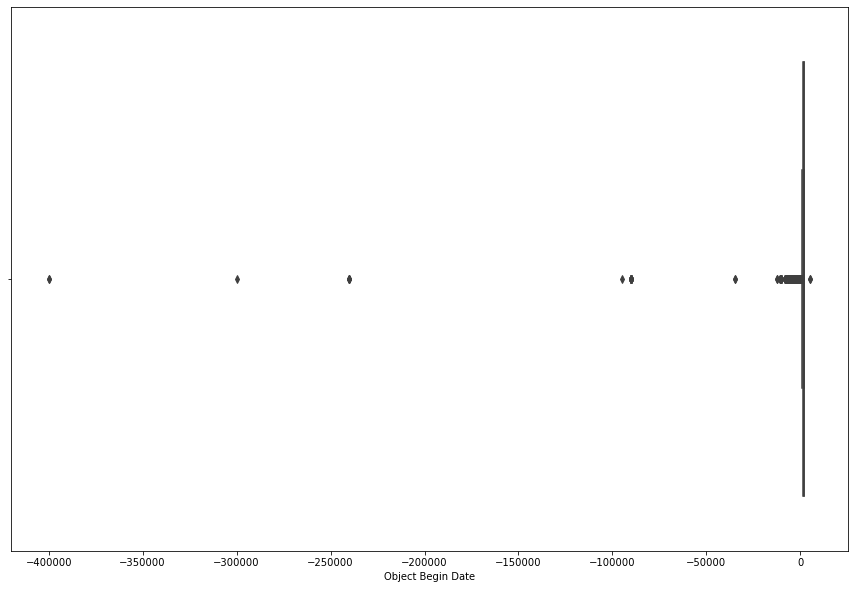

In [41]:
# zobrazeni hodnot pomoci boxplot grafu
plt.figure(figsize=(15, 10))
sns.boxplot(x=df['Object Begin Date'])

#### Object End Date
V dolním kvantilu se vyskytují objekty, jejichž hodnota je nižší nebo rovna roku 51 098 p.K. Jedná se o různé nástroje, či zbraně.

V horním kvantilu se objevují objekty z roku 2080 a novější. To mě zaujalo, v některých případěch jde zjevně o překlep, jako 15335 místo 1533/1535, jinde se jedná zjevně o chybné hodnoty. Při dalším použití datasetu, by bylo nutné data před použitím řádně vyčistit.

In [42]:
# dolni kvantil mezni hodnota
df['Object End Date'].quantile(0.00001)

-51098.499999999985

In [43]:
# horni kvantil horni hodnota
df['Object End Date'].quantile(0.99999)

2080.4416700001457

In [44]:
# ukazka chybnych hodnot v hornim kvantilu
df[df['Object End Date'] >= df['Object End Date'].quantile(0.99999)]

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,Reign,Portfolio,Constituent ID,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Artist Gender,Artist ULAN URL,Artist Wikidata URL,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
42900,1998.488.2,False,False,True,49818,<NA>,Asian Art,1998-01-01,Frieze section,NaN,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,Modern,1950,2099,Red sandstone,H. 3 in. (7.6 cm); W. 7 15/16 in. (20.2 cm); L. 31 9/16 in. (80.2 cm),"Gift of Jeffrey B. Soref, in honor of Martin Lerner, 1998",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sculpture,NaN,http://www.metmuseum.org/art/collection/search/49818,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
100078,04.9.19,False,False,True,188903,<NA>,European Sculpture and Decorative Arts,1904-01-01,Bowl,Wide-rimmed bowl with Vulcan Forging Arms with Venus and Cupid,"Italian, probably Urbino",NaN,NaN,NaN,NaN,3312,Artist,,Fra Xanto Avelli da Rovigo,ca. 1486–1582,,Avelli da Rovigo Fra Xanto,,1486,1582,NaN,NaN,https://www.wikidata.org/wiki/Q1643071,ca. 1528–30,1523,15335,Maiolica (tin-glazed earthenware),Overall (confirmed): 1 1/2 × 10 1/2 in. (3.8 × 26.7 cm),"Rogers Fund, 1904",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ceramics-Pottery,NaN,http://www.metmuseum.org/art/collection/search/188903,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Cupid|Venus|Vulcan,http://vocab.getty.edu/page/aat/300380105|http://vocab.getty.edu/page/ia/901001064|http://vocab.getty.edu/page/ia/901000947,https://www.wikidata.org/wiki/Q5011|https://www.wikidata.org/wiki/Q47652|https://www.wikidata.org/wiki/Q4640
231729,24.63.304,False,False,False,363446,<NA>,Drawings and Prints,1924-01-01,Print,La Jeune Parisienne,NaN,NaN,NaN,NaN,NaN,912059123,Artist|Artist,|After,"Samuel William Reynolds, the elder|Claude-Marie Dubufe","British, London 1773–1835 London|French, Paris 1790–1864 La Celle-Saint-Cloud",|,"Reynolds, Samuel William the elder|Dubufe, Claude-Marie",British|French,1773 |1790,1835 |1864,|,http://vocab.getty.edu/page/ulan/500012659|http://vocab.getty.edu/page/ulan/500025725,https://www.wikidata.org/wiki/Q3471270|https://www.wikidata.org/wiki/Q509454,18th–19th century,1790,2835,Mezzotint,sheet: 13 11/16 x 11 7/16 in. (34.8 x 29.1 cm),"Gift of Georgiana W. Sargent, in memory of John Osborne Sargent, 1924",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search/363446,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
247082,23.112.1595,False,False,True,379662,<NA>,Drawings and Prints,1923-01-01,Drawing,"Design for Landau, no. 958",NaN,NaN,NaN,NaN,NaN,16517,Manufacturer,,Brewster & Co.,"American, New York",,Brewster & Co.,American,,,NaN,NaN,NaN,1850–70,1850,2870,Pen and black ink with metallic ink,sheet: 6 x 10 1/4 in. (15.2 x 26 cm),"Gift of William Brewster, 1923",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drawings,NaN,http://www.metmuseum.org/art/collection/search/379662,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Carriages,http://vocab.getty.edu/page/aat/300185335,https://www.wikidata.org/wiki/Q235356
406751,2016.587.16,False,False,False,697238,<NA>,Drawings and Prints,2016-01-01,Book,My Pretty Pony,NaN,NaN,NaN,NaN,NaN,193731950128502616464,Printer|Artist|Publisher|Artist,| | |,Stamperia Valdonega|Stephen King|The Library Fellows of the Whitney Museum of American Art|Barbara Kruger,"Italian, founded Verona, 1922|American, born Portland, Maine, 1947| |American, born Newark, New Jersey, 1945",| | |,"Stamperia Valdonega|King, Step

Graf níže se rozložením hodnot podobá grafu nad příznakem Object Begin Date i zde by pro budoucí použití bylo vhodné data přeškálovat.

<AxesSubplot:xlabel='Object End Date'>

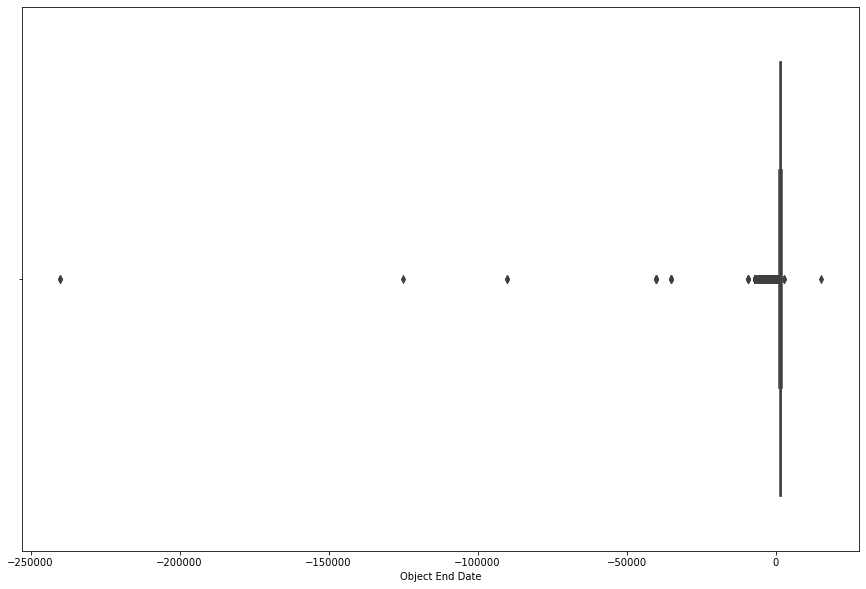

In [45]:
# zobrazeni hodnot pomoci boxplot grafu
plt.figure(figsize=(15, 10))
sns.boxplot(x=df['Object End Date'])

## 6. Detect missing data 
in at least three features, convert them to a proper representation (if they are already not), and impute missing values in at least one feature.

In [46]:
# pocet chybejicich hodnot u jednotlivych sloupcu
df.isnull().sum()

Object Number                   0
Is Highlight                    0
Is Timeline Work                0
Is Public Domain                0
Object ID                       0
Gallery Number             426079
Department                      0
AccessionYear                3556
Object Name                  1691
Title                       29185
Culture                    270425
Period                     386848
Dynasty                    454571
Reign                      466578
Portfolio                  454274
Constituent ID             202269
Artist Role                204368
Artist Prefix              202269
Artist Display Name             0
Artist Display Bio         204368
Artist Suffix              202317
Artist Alpha Sort               0
Artist Nationality         202269
Artist Begin Date          202269
Artist End Date            202269
Artist Gender              374743
Artist ULAN URL            255783
Artist Wikidata URL        260072
Object Date                 13867
Object Begin D

#### Metadata Date
U příznaku nejsou dostupná žádná data, všechny hodnoty odpovídají hodnotě NaN. Je možné, že data byla dříve přístupná, ale při novějších updatech byla smazána a sloupec ponechán. Pro jakoukoliv další prácí se ale momentálně jedná o bezcenný příznak.

#### Gallery Number
Obsahuje pouze 51 776 not NaN hodnot, tj. 10,84% vyplněnost. Příznak byl již přetypován v rámci předchozího bodu.

#### Artist Gender
Příznak obsahující gender autora. Po průzkumu dat se ukázalo, že jediný gender, který je zaznamenán je Female. Jednotliví autoři v rámci jednoho záznamu jsou odděleni pomocí |. Zdá se, že gender Male je nahrazen prázdným stringem, či hodnotou NaN. 

Zde ale narážíme na několik problémů. Zaprvé jako autor je často zapsán nějaký spolek, firma, škola apod. Zadruhé záznamy jsou psány v různých jazycích. Jména spolků jsou ponechány v původních jazycích. Část společností lze rozpoznat pomocí klíčových slov, které ve svých názvech obsahují (company, corporation, inc., ...), to ale neplatí pro všechny názvy. Dále často se setkáváme s tím, že místo pouze jednoho autora, je uvedeno autorů více, kteří jsou odděleni nějakou spojkou (jinou než zmiňované |). I zde však narážíme na problematiku cizích jazyků -- y pro španělštinu, und němčina, e italština, aj. V neposlední řadě ne všichni autoři mají vyplněné jméno.


Na základě průzkumu dat jsem vyfiltrovala problematické autory, pomocí klíčových slov signalizujících názvy společnosti, více autorů apod. Klíčová slova jsem získala výpočtem nejčastěji se vyskytujících slov v příznaku.Z těchto slov byla vyfiltrována jména a přijmení. Jména a přijmení, které byly filtrovány, byla nejoblíbenější jména z nejčastěji se vyskytujicích národností (příznak 'Artist Nationality'). Vyfiltrovaná, nejčastěji používaná slova jsem prošla vybrala ty, které odpovídají názvu společností, škol, více autorům, chybějicím hodnotám apod. 

Pokud jméno autora neobsahovalo klíčová slova, byl gender daného autora změněn na 'Male'.

In [47]:
# hodnoty priznaku Artist Gender spolecne s jejich cetnosti
df['Artist Gender'].value_counts()

|                                                                                                                                                                                         56855
||                                                                                                                                                                                        21063
Female                                                                                                                                                                                     8708
|||                                                                                                                                                                                        6245
Female|                                                                                                                                                                                    2680
||||                                    

In [48]:
# nejcastejsi anglicka prijmeni a  krestni jmena
df_surnames_en = pd.read_csv('surnames.csv', low_memory=False)
df_firstnames_en = pd.read_csv('girl_boy_names_2000.csv', low_memory=False)

# nejcastejsi spanelska prijmeni a  krestni jmena
df_surnames_sp = pd.read_csv('surnames_spanish.csv', low_memory=False)
df_firstnames_sp_w = pd.read_csv('female_names_spanish.csv', low_memory=False)
df_firstnames_sp_m = pd.read_csv('male_names_spanish.csv', low_memory=False)

# nejcastejsi nemecka prijmeni a  krestni jmena
df_surnames_ge = pd.read_csv('nachnamen.csv', low_memory=False)
df_firstnames_ge = pd.read_csv('Vornamen.csv', low_memory=False)

# nejcastejsi francouzska prijmeni a  krestni jmena
df_surnames_fr = pd.read_csv('patronymes.csv', low_memory=False)
df_firstnames_fr = pd.read_csv('prenom.csv', low_memory=False)

In [49]:
# sjednoceni prijmeni do np array
surnames = np.concatenate((df_surnames_en['name'].str.lower().head(1000).unique(),
                          df_surnames_sp['surname'].str.lower().head(1000).unique()), axis=None)
surnames = np.concatenate((surnames,
                          df_surnames_ge['Nachname'].str.lower().head(1000).unique()), axis=None)
surnames = np.concatenate((surnames,
                          df_surnames_fr['patronyme'].str.lower().head(1000).unique()), axis=None)

# sjednoceni krestnich jmen do np array
first_names = np.concatenate((df_firstnames_en['Girl Name'].str.lower().head(1000).unique(), 
                           df_firstnames_en['Boy Name'].str.lower().head(1000).unique()), axis=None) 
first_names = np.concatenate((first_names, 
                           df_firstnames_sp_w['name'].str.lower().head(1000).unique()), axis=None) 
first_names = np.concatenate((first_names, 
                           df_firstnames_sp_m['name'].str.lower().head(1000).unique()), axis=None) 
first_names = np.concatenate((first_names, 
                           df_firstnames_ge['vorname'].str.lower().head(1000).unique()), axis=None) 
first_names = np.concatenate((first_names, 
                           df_firstnames_fr['prenom'].str.lower().head(1000).unique()), axis=None)

In [50]:
# vytvoreni slovniku nejcasteji pouzivanych slov
# do slovniku nejsou zarazena nejcastejsi jmena a prijmeni
all_artists = df['Artist Display Name'].to_numpy()
words_cnt = Counter()
for row in all_artists:
    if not pd.isna(row):
        row_artists = [artist.strip() for artist in row.split('|') if not pd.isna(artist)]
        row_words = []
        for artist in row_artists:
            artist_words = [word.strip().rstrip(',').strip('“').strip('"').lower() for word in artist.split() 
                            if (word.strip().rstrip(',').strip('“').strip('"').lower() not in first_names 
                                and not pd.isna(word.strip().rstrip(',').strip('“').strip('"').lower()) 
                                and word.strip().rstrip(',').strip('“').strip('"').lower() not in surnames )]
            row_words += artist_words
        for word in row_words:
            words_cnt[word.lower()] += 1
print(words_cnt)       

KeyboardInterrupt: 

In [ ]:
# 1000 slov, ktere se vyskytuji nejcasteji
words_cnt.most_common(1000)

In [ ]:
# patern obsahujici klicova slova spolecnosti, spojek a v ruznych jazycich apod
patt_0 = ' und | e |&| and | y | et |'
patt_1 = 'association|community|inc\.|co\.|manufact|factory|company|corporation|group|firm|works|'
patt_2 = ' sons|committee|fa\.|anonymous|century|ltd\.|american|painter| new |unknown|editions| art'
patt_3 = '| son|italian|16th|19th|17th|england|pottery|artist|porcelain|british|unidentified|gallery|supply|'
patt_4 = 'limited|royal|ireland|works|museum|studio|society|universal|workshop|club|librairie|tobacco|cigarettes'
patt_5 = '|general|school|university|academy|metropolitan|national|city|graphics|printing|stereoscopic|gráfica'

pattern = patt_0 + patt_1 + patt_2 + patt_3 + patt_4 + patt_5
man_pattern = re.compile(f".*({pattern}).*")

In [ ]:
# fce signalizujici zda se jedna o muze - slova ve jmene autora neobsahuji klicova slova pro spolecnosti
def is_man(name):
    if pd.isnull(name) or man_pattern.search(name):
        return False
    
    return True

In [ ]:
# Doplneni chybejicich hodnot do nove vytvoreneho sloupce artist_gender_changed
df['artist_gender_changed'] = np.nan

for index, row in df.iterrows():
    genders = []
    new_row_genders = ''
    
    if not pd.isna(row['Artist Gender']):
        row_genders = [gender.strip() for gender in row['Artist Gender'].split('|')]
        row_names = [name.strip() if not pd.isna(name) else "" for name in row['Artist Display Name'].split('|')]
        row_genders_count = len(row_genders)

        for gender_i in range(row_genders_count):
            if row_genders[gender_i].lower() == 'female':
                new_row_genders += 'Female'
            else:
                if is_man(row_names[gender_i]):
                    new_row_genders += 'Male'

            if gender_i != row_genders_count - 1:
                    new_row_genders += '|'
    else:
        if is_man(row['Artist Display Name']):
            new_row_genders = 'Male'
   
            
    df.loc[index, 'artist_gender_changed'] = new_row_genders

In [ ]:
# hodnoty priznaku artist_gender_changed spolecne s jejich cetnosti
df['artist_gender_changed'].value_counts()

## 7. Medium Feature
Focus more precisely on the cleaning of the "Medium" feature. As if you were to use it in KNN algorithm later.

Odpovídá materiálu, ze kterého je objekt vyroben. Objekt může být složen z více materiálů v takovém případě jsou jednotlivé materiály odděleny nejčastěji čárkou, někdy ale také tečkou, středníkem nebo pouze mezerou. Dodatečné informace k materiálu, např. specifikace typu použitého dřeva, jsou buď vloženy do závorek nebo za středník (je tedy problematické oddělit, kde se jedná pouze o dodatek k předchozímu materiálu a kdy se jedná o další materiál). 
Někdy se objevují navíc slova primary a secondary pro rozdělení důležitosti materiálů, jejich použití je ale velmi nekonzistentní, např.:
- primary: mahogany; secondary: cherry (medial braces), ash or oak (stubb tenon feet).
- prima vera, american ash (secondary wood); marquetry of various woods and brass; replacement upholstery
- primary: mahogany.  secondary: poplar (medial braces, probably original)

Někdy se v názvu objevuje jeden materiál vícekrát s různými specifikacemi:
- ebonized mahogany, mahogany, mahogany veneer, gilding, bronzing, stamped brass ornaments, and glass (secondary woods: pine, poplar, cherry)\r\n

Z průzkumu dat se domnívám, že pořadí materiálů hraje roli. Tedy první zmíněný materiál tvoří majoritní část objektu, atd. V datech není jednotný přístup v používání závorek, čárek, středníků, či jiných oddělovacích znamínek. Automatizace čištění dat a jejich rozdělení podle jednotlivých materiálů je tedy velmi problematické. 

Na data jsem nejprve aplikovala základní čištění: 
- velikost písmen na malá, 
- odstranění znaků \r a \n,
- nahrazení nepísmených znaků mezerou.
Následně jsem vytvořila slovník nejčastěji používaných slov napříč záznamy. Pro jednotlivé záznamy jsem brala pouze unikátní slova (kvůli problematice opakování jednoho materiálu), z daných slov jsem vytvořila pouze kořeny slov pomocí stemmatizace a odstranila stopslova.

Z takto vytvořeného slovníku jsem vybrala ta slova, které odpovídala materiálu. Na základě tohoto průzkumu jsem vytvořila 10 skupin materiálů, pod které jsem řadila odpovídající materiály. Pro každou skupinu jsem vytvořila odpovídající nový sloupec. Nakonec jsem prošla jednotlivé záznamy a pokud záznam obsahoval některé ze slov patřící některé z vytvořených 10 skupin, v odpovídajícím sloupci jsem změnila defaultní False na True.

In [ ]:
# ukazka nejcastejsich zaznamu s cetnosti vyssi nez 100
df['Medium'].value_counts().loc[lambda x: x>100]

In [ ]:
# sjednoceni pismen na mala
df['Medium'] = df['Medium'].str.lower()

In [ ]:
# nejcastejsi slova
all_mediums = df['Medium'].to_numpy()
medium_words_cnt = Counter()

porter_stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

for medium in all_mediums:
    if not pd.isna(medium):
        # tokenizace a odstraneni vsech znaku, ktera nejsou pismena
        tokens = word_tokenize(re.sub(r'[^a-zA-Z\s]', ' ', medium))
        
        # prevedeni slov do zakladniho tvaru a odstraneni stopslov
        tokens_l = len(tokens)
        for i in range(tokens_l):
            tokens[i] = porter_stemmer.stem(tokens[i]).lower()
        
        tokens = set(tokens)
        tokens = list(tokens)
        for token in tokens:
            if token not in stop_words:
                medium_words_cnt[token.lower()] += 1            
print(medium_words_cnt)   

In [ ]:
# 1000 slov, ktere se vyskytuji nejcasteji
medium_words_cnt.most_common(1000)

In [ ]:
# slovnik s vytvorenymi skupinami a slovy, ktera pod ne nalezi
materials = {
    'paper':'paper',
    'print':'paper',
    
    'wood':'wood',
    'woodcut':'wood',
    'mahogani':'wood',
    'oak':'wood',
    'pine':'wood',
    'woodblock':'wood',
    'mapl':'wood',
    'walnut':'wood',
    'bamboo':'wood',
    'palm':'wood',
    'wooden':'wood',
    
    'nephrit':'gemstone',
    'crystal':'gemstone',
    'turquois':'gemstone',
    'diamond':'gemstone',
    'hematit':'gemstone',
    'emerald':'gemstone',
    
    'glass':'glass',
    'engrav':'glass',
    
    'leather':'animal',
    'ivori':'animal',
    'shell':'animal',
    'bone':'animal',
    'skin':'animal',
    'pearl':'animal',
    'hair':'animal',
    'tortois':'animal',
    'tortoiseshel':'animal',
    'horsehair':'animal',
    
    'porcelain':'potteri',
    'terracotta':'potteri',
    'potteri':'potteri',
    'ceram':'potteri',
    'faienc':'potteri',
    'stonepast':'potteri',
    
    'stone':'stone',
    'rock':'stone',
    
    'plastic':'plastic',
    
    'metal':'metal',
    'alloy':'metal',
    'brass':'metal',
    'steel':'metal',
    'copper':'metal',
    'gold':'metal',
    'silver':'metal',
    'bronz':'metal',
    'polychrom':'metal',
    'tin':'metal',
    'platinum':'metal',
    'cobalt':'metal',
    
    'textil':'textil',
    'wool':'textil',
    'wove':'textil',
    'linen':'textil',
    'cotton':'textil',
    'silk':'textil',
    'synthet':'textil',
    'lace':'textil',
    'velvet':'textil',
    'cloth':'textil',
    'nylon':'textil',
}

In [ ]:
df['paper'] = False
df['wood'] = False
df['gemstone'] = False
df['glass'] = False
df['animal'] = False
df['potteri'] = False
df['stone'] = False
df['plastic'] = False
df['metal'] = False
df['textil'] = False


for index, row in df.iterrows():
    tokens = []
    if not pd.isna(row['Medium']):
        # tokenizace a odstraneni vsech znaku, ktera nejsou pismena
        tokens = word_tokenize(re.sub(r'[^a-zA-Z\s]', ' ', row['Medium']))
        
        # prevedeni slov do zakladniho tvaru a odstraneni stopslov
        tokens_l = len(tokens)
        for i in range(tokens_l):
            tokens[i] = porter_stemmer.stem(tokens[i]).lower()
        
        tokens = set(tokens)
        tokens = list(tokens)
        
        for token in tokens:
            if token in materials:
                df.loc[index, materials[token]] = True

In [ ]:
df.head(100)

## 8. Extraction of physical dimensions
Focus on the extraction of physical dimensions of each item (width, depth and height in centimeters) from the "Dimensions" feature.

Příznak Dimensions obsahuje string s rozměry daného objektu. Příznak je velmi nekonzistentní v zápisu samotných rozměrů. Primárně jsou rozměry zadány v jednotkách inch, ve většině případů jsou odpovídající hodnoty v cm uvedeny v přidružené závorce. Ta může obsahovat všechny tři rozměry nebo pouze jejich podmnožinu.
- 25 1/4 x 21 1/2 x 13 1/2 in. (64.1 x 54.6 x 34.3 cm)
- h. 23 1/2 in. (59.7 cm)

Někdy jsou uvedeny ale také jiné jednotky -- m, mm, ale i např. gramy. 
- l. 37 ft. 4 in. (11.4 m); w. 11 in. (27.9 cm)
- overall: 1 1/16 x 4 1/4 in. (2.7 x 10.8 cm); 1 oz. 18 dwt. (59.1 g)lip: diam. 3/8 in. (8.6 cm)

Samotné rozměry mohou být uvedeny různýmy způsoby, např. length místo height, h. místo height,... Často není uvedeno pořadí uváděných rozměrů, v takovém případě čtu pořadí v ustáleném řazení: výška, šířka, hloubka. V případě zadání pouze podmnožiny odebírám rozměry odzadu.

Některé záznamy obsahují několik různých objektů, např. box různých fragmentů. V takovém případě jsou uvedeny i některé rozměry dalších objektů. Automatickým parsovaním je ale velmi těžké jednotlivé objekty od sebe oddělit, jelikož je způsob uvádění jednotlivých objektů velmi nekonzistentní. V těchto případech se zaměřuji pouze na rozměry prvních objektů.
- bowl:2 1/2 in. (6.4 cm)body diameter: 5 1/8 in. (13 cm)plate:1 in. (2.5 cm)body diameter: 6 1/2 in. (16.5 cm)
- overall: 3 x 12 13/16 x 4 5/16 in. (7.6 x 32.5 x 11 cm); 7 oz. 12 dwt. (236.7 g)foot: diam. 3 1/2 in. (8.9 cm)
- overall: 3 3/8 x 8 1/8 in. (8.6 x 20.6 cm); 8 oz. 15 dwt. (272.8 g)lip: diam. 5 1/2 in. (14 cm)foot: diam. 3 11/16 in. (9.4 cm)

Některé záznamy obsahují pouze některé rozměry, např. jedná-li se o papíry, jsou uvedeny výška a šířka. Další specifickou skupinu tvoří kulaté a válcovité předměty (mince, tyče,...) v těchto případech je uveden průměr, jako diam, případně diameter. Ten může být uveden samostatně (často mince) anebo v kombinaci s jiným rozměrem. Pokud je diam uveden samostatně, uvedu jeho hodnotu, jako výšku a šířku objektu. Pokud je uveden v kombinaci s jiným rozměrem, jeho hodnotu uvedu do druhého zbývajícího rozměru.
- diam. 1/2 in. (1.3 cm)
- h. 2 1/2 in. (6.4 cm); diam. 10 in. (25.4 cm)

Snažila jsem se postihnout co největší množství případů, pokud bych ale měla s datasetem do budoucna dále pracovat, zaměřila bych se ještě na převod jednotek, pokud jsou jiné než cm, momentálně beru pouze záznamy, které jsou v cm. A také bych se pokusila nějakým způsobem získat rozměry dalších objektů a jako celkové rozměry uvést například průměrné rozměry všech zadaných objektů, popř. rozměry největšího z objektů.

In [ ]:
df['Dimensions'].describe()

In [ ]:
# ukazka moznych hodnot
df['Dimensions'].drop_duplicates().head(1000)

In [ ]:
# trocha cisteni dat, pred extrakci
df['Dimensions'] = df['Dimensions'].str.lower()

df['Dimensions'] = df['Dimensions'].str.replace('\r', '')
df['Dimensions'] = df['Dimensions'].str.replace('\n', '')

# sjednoceni mnozstvi mezer
df['Dimensions'].replace(to_replace=' +', value=' ', regex=True, inplace=True)

# nahrazeni hodnot symbolizujicich chybejici hodnoty na NaN hodnotu
df['Dimensions'] = df['Dimensions'].replace('see attached list', np.nan)
df['Dimensions'] = df['Dimensions'].replace('dimensions unavailable', np.nan)
df['Dimensions'] = df['Dimensions'].replace('varied dimensions, please see attached list', np.nan)
df['Dimensions'] = df['Dimensions'].replace('dimensions not recorded', np.nan)
df['Dimensions'] = df['Dimensions'].replace('measurements cannot be determined.', np.nan)
df['Dimensions'] = df['Dimensions'].replace('cannot be measured', np.nan)
df['Dimensions'] = df['Dimensions'].replace('can not be measured', np.nan)
df['Dimensions'] = df['Dimensions'].replace('fragment not measured', np.nan)
df['Dimensions'] = df['Dimensions'].replace('not taken', np.nan)
df['Dimensions'] = df['Dimensions'].replace('cannot be measured', np.nan)
df['Dimensions'] = df['Dimensions'].replace('can not be measured', np.nan)
df['Dimensions'] = df['Dimensions'].replace('not available', np.nan)
df['Dimensions'] = df['Dimensions'].replace('not measured.', np.nan)
df['Dimensions'] = df['Dimensions'].replace('dimensions not available', np.nan)

In [ ]:
# parsovaci funkce
def get_dim(dim_string):
    height = np.nan
    width = np.nan
    depth = np.nan
    
    # dimenze ve tvaru:
    # h. 9 1/2 in. (24.1 cm); w. 7 5/16 in. (18.6 cm); d. 11 1/2 in. (29.2 cm)
    dim_h = re.findall(r'h[^;,]*?\([^;,]*?\d+ cm\)', dim_string)
    dim_w = re.findall(r'w[^;,]*?\([^;,]*?\d+ cm\)', dim_string)
    # musi byt osetreno kvuli zamene s diam
    dim_d = re.findall(r'depth[^;,]*?\([^;,]*?\d+ cm\)', dim_string)
    if not dim_d:
        dim_d = re.findall(r'd\.[^;,]*?\([^;,]*?\d+ cm\)', dim_string)
    
    if not dim_h and not dim_w:
        # v predchozim tvaru nebyla nalezena ani vyska ani sirka
        # hledani dimenzi ve tvaru:
        # diam. 12 3/4 in. (32.4 cm)
        dim_h = re.findall(r'^diam[^;,]*?\([^;,]*?\d+ cm\)', dim_string)
        if dim_h: 
            dims = re.findall(r'(\d+(?:\.\d+)?) cm\)', str(dim_h[0]))
            if dims:
                height = float(dims[0])
                width = height
                if dim_d:
                    depth = float(re.findall(r'(\d+(?:\.\d+)?) cm\)', str(dim_d[0]))[0])
                return (height, width, depth)
    
    if dim_h and not dim_w:
        # v predchozim tvaru byla nalezena vyska, ale ne sirka
        # hledani dimenzi ve tvaru:
        # h. 2 1/2 in. (6.4 cm); diam. 10 in. (25.4 cm)
        dim_w = re.findall(r'; diam[^;,]*?\([^;,]*?\d+ cm\)', dim_string)
        if dim_w:
            width = float(re.findall(r'(\d+(?:\.\d+)?) cm\)', str(dim_w[0]))[0])
        height = float(re.findall(r'(\d+(?:\.\d+)?) cm\)', str(dim_h[0]))[0])
        if dim_d:
            depth = float(re.findall(r'(\d+(?:\.\d+)?) cm\)', str(dim_d[0]))[0])
        return (height, width, depth)

    if dim_w and not dim_h:
        # v predchozim tvaru byla nalezena sirka, ale ne vyska
        # hledani dimenzi ve tvaru:
        # l. 37 ft. 4 in. (11.4 cm); w. 11 in. (27.9 cm)
        dim_h = re.findall(r'l\.[^;,]*?\([^;,]*?\d+ cm\)', dim_string)
        if dim_h:
            height = float(re.findall(r'(\d+(?:\.\d+)?) cm\)', str(dim_h[0]))[0])
        width = float(re.findall(r'(\d+(?:\.\d+)?) cm\)', str(dim_w[0]))[0])
        if dim_d:
            depth = float(re.findall(r'(\d+(?:\.\d+)?) cm\)', str(dim_d[0]))[0])
        return (height, width, depth)
    
    if not dim_h and not dim_w:
        # nebyly nalezeny dimenze zadane pomoci diam,
        # hledani dimenzi ve tvarech:
        # vyska x sirka x hloubka:
        # 9 1/2 x 28 1/4 x 18 1/2 in. (24.1 x 71.8 x 47 cm)
        # vyska x sirka:
        # 1/2 x 1 1/2 in. (6.4 x 3.8 cm)
        dim_in_par = re.findall(r'\([^\(;]*?\d+ cm\)', dim_string)
        if dim_in_par:
            dims = re.findall(r'\d+(?:\.\d+)?', str(dim_in_par[0]))

            if dims:
                height = float(dims[0])

            dims_l = len(dims)
            if dims_l > 1:
                width = float(dims[1])
            if dims_l > 2:
                depth = float(dims[2])

            return (height, width, depth)
        else:
            # nenalezeno hledani tvaru:
            # l. 4 3/4 in. (12.1 cm) - zadana vyska jako l.
            dim_h = re.findall(r'l\.[^;,]*?\([^;,]*?\d+ cm\)', dim_string)
            if dim_h:
                height = float(re.findall(r'(\d+(?:\.\d+)?) cm\)', str(dim_h[0]))[0])
            if dim_d:
                depth = float(re.findall(r'(\d+(?:\.\d+)?) cm\)', str(dim_d[0]))[0])
            return (height, width, depth)
            
    # jinak:        
    if dim_h:
        height = float(re.findall(r'(\d+(?:\.\d+)?) cm\)', str(dim_h[0]))[0])
    if dim_w:
        width = float(re.findall(r'(\d+(?:\.\d+)?) cm\)', str(dim_w[0]))[0])
    if dim_d:
        depth = float(re.findall(r'(\d+(?:\.\d+)?) cm\)', str(dim_d[0]))[0])
    return (height, width, depth)

In [ ]:
df[['height', 'width', 'depth']] = np.nan

# parsovani dimenzi a zapsani do nove vytvorenych sloupcu
for index, row in df.iterrows():
    if not pd.isna(row['Dimensions']):
        height, width, depth = get_dim(row['Dimensions'])
        
        df.loc[index, 'height'] = height
        df.loc[index, 'width'] = width
        df.loc[index, 'depth'] = depth

In [ ]:
df.head(10)

## 5b) Hledani odlehlých hodnot u dimenzí

In [ ]:
df_fulldim = df[(df['height'].notna())
               & (df['width'].notna())
               & (df['depth'].notna())][['height', 'width', 'depth']]

In [ ]:
fig = plt.figure(figsize=(30,20))
ax = plt.axes(projection='3d')

ax.scatter(df_fulldim['height'], df_fulldim['width'], df_fulldim['depth'], c='b')

ax.set_xlabel('Height')
ax.set_ylabel('Width')
ax.set_zlabel('Depth')

plt.show()

## 5b) Shluková analýza pomocí kMeans
Pro detekci odlehlých hodnot příznaků dimenzí jsem použila metodu kMeans. Jednotlivé datové body jsem rozdělila do 4 shluků.

In [ ]:
# pocet shluku
k = 4
kmeans = KMeans(n_clusters = k, random_state = 1).fit(df_fulldim)

In [ ]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = df_fulldim.index.values
cluster_map['height'] = df_fulldim['height'].values
cluster_map['width'] = df_fulldim['width'].values
cluster_map['depth'] = df_fulldim['depth'].values
cluster_map['cluster'] = kmeans.labels_

In [ ]:
# pocet odlehlych hodnot
len(cluster_map[cluster_map['cluster'] == 2])

In [ ]:
# odlehle hodnoty
cluster_map[cluster_map['cluster'] == 2]

In [ ]:
fig = plt.figure(figsize=(30,20))
ax = plt.axes(projection='3d')

ax.scatter(df_fulldim['height'], df_fulldim['width'], df_fulldim['depth'], 
            c=kmeans.labels_, cmap='viridis',
            edgecolor='k', s=40, alpha = 0.5)

ax.set_xlabel('Height')
ax.set_ylabel('Width')
ax.set_zlabel('Depth')

plt.show()

Na grafu výše odpovídají odlehlým hodnotám body zobrazené zelenou barvou. Jedná se o objekty mající alespoň jeden rozměr nadprůměrně vysoký oproti většině ostatním bodům. V tabulce níže je vidět ukázka těchto bodů.

In [ ]:
# ukazka objektu, ktere odpoviji odlehlym hodnotam
df[df.index.isin(cluster_map[cluster_map['cluster'] == 2]['data_index'].unique())].head()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=26eec0b9-d60b-482c-b217-f6e4a65e05ad' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>